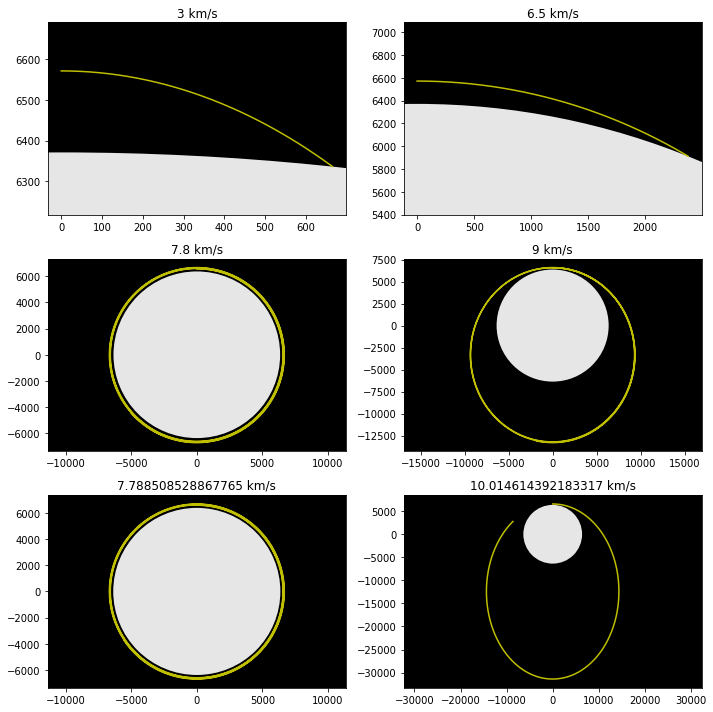

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.constants import G

# Convert Newtonian constant of gravitation from m3.kg-1.s-2 to km3.kg-1.s-2
G /= 1.e9
# Planet radius, km
R = 6371
# Planet mass, kg
M = 5.9722e24

fac = G * M

def calc_a(r):
    #acceleration of rocket from gravity at radius r
    r3 = np.hypot(*r)**3
    return -fac * r / r3

def get_trajectory(h, launch_speed, launch_angle):
    v0 = launch_speed
    theta = np.radians(launch_angle)

    N = 100000
    tgrid, dt = np.linspace(0, 25000, N, retstep=True)
    tr = np.empty((N,2))
    v = np.empty((N,2))

    # Initial rocket position, velocity and acceleration
    tr[0] = 0, R + h
    v[0] = v0 * np.sin(theta), v0 * np.cos(theta)
    a = calc_a(tr[0])

    for i, t in enumerate(tgrid[1:]):
        # Calculate the rocket's next position based on its instantaneous velocity.
        r = tr[i] + v[i]*dt
        if np.hypot(*r) < R:
            # Our rocket crashed.
            break
        # Update the rocket's position, velocity and acceleration.
        tr[i+1] = r
        v[i+1] = v[i] + a*dt
        a = calc_a(tr[i+1])

    return tr[:i+1]

# Rocket initial speed (km/s), angle from local vertical (deg)
launch_speed, launch_angle = 2.92, 90
# Rocket launch altitute (km)
h = 200
tr = get_trajectory(h, launch_speed, launch_angle)

def plot_trajectory(ax, tr):
    earth_circle = Circle((0,0), R, facecolor=(0.9,0.9,0.9))
    ax.set_facecolor('k')
    ax.add_patch(earth_circle)
    ax.plot(*tr.T, c='y')
    # Make sure our planet looks circular
    ax.axis('equal')

    # Set Axes limits to trajectory coordinate range, with some padding.
    xmin, xmax = min(tr.T[0]), max(tr.T[0])
    ymin, ymax = min(tr.T[1]), max(tr.T[1])
    dx, dy = xmax - xmin, ymax - ymin
    PAD = 0.05
    ax.set_xlim(xmin - PAD*dx, xmax + PAD*dx)
    ax.set_ylim(ymin - PAD*dy, ymax + PAD*dy)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
for i, launch_speed in enumerate([3, 6.5, 7.8, 9, np.sqrt(G*M/(R+h)), np.sqrt(2*G*M/(R+h))-1]):
    tr = get_trajectory(h, launch_speed, launch_angle)
    ax = axes[i//2,i%2]
    plot_trajectory(ax, tr)
    ax.set_title('{} km/s'.format(launch_speed))
plt.tight_layout()

plt.savefig('orbit.png')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class flying_objects():
    g = -9.8
    m_missle = 100 #kg
    def __init__(self, name, position, velocity):
        self.name = "name"
        self.position = position
        self.velocity = velocity
        self.acceleration = [0, flying_objects.g]
            

def capture_object(flying_object):
    N = 10000
    ts = [0]
    g = -9.8
    xs = [flying_object.position[0]]
    ys = [flying_object.position[1]]
    t = 0
    y = 0.01
    x_dot_i = flying_object.velocity[0]
    y_dot_i = flying_object.velocity[1]
    while y > 0:
        t+=0.001
        ts.append(t)
        x = xs[0]+ x_dot_i*t
        xs.append(x)
        y = .5*g*t**2 +y_dot_i*t + ys[0]
        ys.append(y)

    return xs, ys
      

In [2]:
alien_missile = flying_objects("alien_missile", [1, 1], [5, 5])

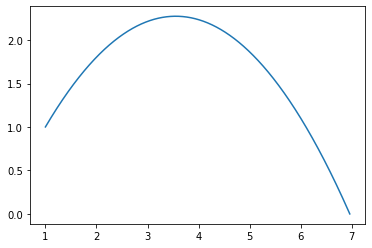

In [16]:
results = capture_object(alien_missile)
plt.plot(results[0], results[1])
plt.show()

In [ ]:
planets = ["mercury", "venus", "earth", "mars", "jupyter", "saturn", "uranus", "neptune"]
air_densities = []